In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid');

dataset is hosted here: https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/data

In [5]:
pbp_df = pd.read_csv('..\data\play-by-play\compressed_NFL Play by Play 2009-2018 (v5).csv.zip', iterator=True, low_memory=False, chunksize=10000)

df = pd.DataFrame()
for chunk in pbp_df:
    df = pd.concat([df, chunk])

In [9]:
df.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [11]:
df.shape

(449371, 255)

In [12]:
rushing_df = df[['rush_attempt', 'rush_touchdown', 'yardline_100', 'two_point_attempt']]

#exclude 2 pt conversion plays and only include rushing plays
rushing_df = rushing_df.loc[(rushing_df['two_point_attempt'] == 0) & (rushing_df['rush_attempt'] == 1)]

rushing_df.shape

(136271, 4)

In [15]:
rushing_df.sort_values('yardline_100').head(10)

,rush_attempt,rush_touchdown,yardline_100,two_point_attempt
93666,1.0,0.0,1.0,0.0
433922,1.0,0.0,1.0,0.0
239303,1.0,1.0,1.0,0.0
414439,1.0,1.0,1.0,0.0
433883,1.0,1.0,1.0,0.0
393453,1.0,1.0,1.0,0.0
85419,1.0,0.0,1.0,0.0
211632,1.0,0.0,1.0,0.0
239442,1.0,0.0,1.0,0.0
211633,1.0,0.0,1.0,0.0


In [33]:
rushing_df_probs = rushing_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize=True).reset_index(name='probability_of_touchdown')
rushing_df_probs.head()

,yardline_100,rush_touchdown,probability_of_touchdown
0,1.0,1.0,0.540170
1,1.0,0.0,0.459830
2,2.0,0.0,0.602713
3,2.0,1.0,0.397287
4,3.0,0.0,0.666300


In [36]:
# drop rows where no TD was scored
rushing_df_probs = rushing_df_probs.loc[rushing_df_probs['rush_touchdown'] == 1].drop(columns='rush_touchdown')
rushing_df_probs.head(15)

,yardline_100,probability_of_touchdown
0,1.0,0.540170
3,2.0,0.397287
5,3.0,0.333700
7,4.0,0.271493
9,5.0,0.196447
11,6.0,0.155720
13,7.0,0.149153
15,8.0,0.122673
17,9.0,0.082192
19,10.0,0.095689


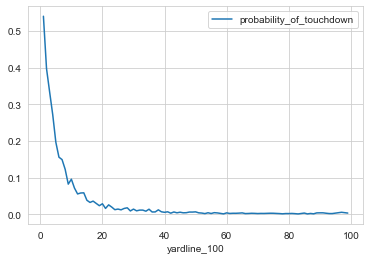

In [38]:
rushing_df_probs.plot(x='yardline_100', y='probability_of_touchdown');

In [39]:
# 2019 play by play data

PBP_2019_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/data/master/2019pbp.csv'

pbp_2019_df = pd.read_csv(PBP_2019_BASE_URL, 
                          iterator=True, 
                          low_memory=False, 
                          chunksize=10000,
                          index_col=0)

pbp_2019_df_final = pd.DataFrame()
for chunk in pbp_2019_df:
    pbp_2019_df_final = pd.concat([pbp_2019_df_final, chunk])

In [40]:
pbp_2019_df_final.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown',
       'NextScore', 'TeamWin', 'SeasonYear', 'Yards', 'Formation', 'PlayType',
       'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'PassType', 'IsSack',
       'IsChallenge', 'IsChallengeReversed', 'Challenger', 'IsMeasurement',
       'IsInterception', 'IsFumble', 'IsPenalty', 'IsTwoPointConversion',
       'IsTwoPointConversionSuccessful', 'RushDirection', 'YardLineFixed',
       'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay',
       'PenaltyType', 'PenaltyYards', 'RushingPlayer', 'TargetedPlayer',
       'PassingPlayer'],
      dtype='object')

In [41]:
pbp_2019_df_final.shape

(42186, 43)

In [50]:
pbp_2019_df_final.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,NextScore,TeamWin,...,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards
count,4.218600e+04,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.0,42186.0,...,42186.0,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000
mean,2.019106e+09,2.568127,6.326009,27.215735,1.666003,7.302209,45.411321,0.357322,0.0,0.0,...,0.0,0.010074,0.014009,0.088394,0.002702,0.001399,26.886408,0.076163,0.058195,0.628265
std,1.103817e+04,1.120506,4.672677,18.268980,1.170637,4.989110,26.773955,0.479217,0.0,0.0,...,0.0,0.099866,0.117531,0.283871,0.051914,0.037372,14.270611,0.265261,0.234114,2.633319
min,2.019090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019093e+09,2.000000,2.000000,11.000000,1.000000,3.000000,25.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
50%,2.019103e+09,3.000000,6.000000,27.000000,1.000000,9.000000,40.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000
75%,2.019113e+09,4.000000,10.000000,43.000000,2.000000,10.000000,66.000000,1.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000
max,2.019122e+09,5.000000,15.000000,59.000000,4.000000,40.000000,99.000000,1.000000,0.0,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,53.000000


In [53]:
pbp_2019_df_final.describe(include='object').T

,count,unique,top,freq
GameDate,42186,47,2019-09-22,2486
OffenseTeam,39078,32,PHI,1312
DefenseTeam,42186,32,DET,1413
Formation,41470,7,SHOTGUN,18668
PlayType,40732,16,PASS,17522
PassType,17517,11,SHORT RIGHT,5565
RushDirection,11335,7,CENTER,3110
YardLineDirection,42186,2,OWN,25154
PenaltyTeam,3729,32,JAX,147
PenaltyType,3729,51,OFFENSIVE HOLDING,822


In [46]:
pbp_2019_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42186 entries, 0 to 42185
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          42186 non-null  int64  
 1   GameDate                        42186 non-null  object 
 2   Quarter                         42186 non-null  int64  
 3   Minute                          42186 non-null  int64  
 4   Second                          42186 non-null  int64  
 5   OffenseTeam                     39078 non-null  object 
 6   DefenseTeam                     42186 non-null  object 
 7   Down                            42186 non-null  int64  
 8   ToGo                            42186 non-null  int64  
 9   YardLine                        42186 non-null  int64  
 10  SeriesFirstDown                 42186 non-null  int64  
 11  NextScore                       42186 non-null  int64  
 12  TeamWin                         

In [47]:
pbp_2019_df_final['YardLineFixed'].unique()

array([50, 49, 16, 15,  9, 44, 22, 30, 27, 45, 40, 42, 47, 33, 32, 41, 38,
        1, 21, 46, 24, 39,  3, 26, 20, 23, 19, 25, 31, 36, 48,  7, 28, 43,
       37,  6, 12, 34, 14, 35,  8, 10,  5, 18,  4, 17,  2, 11, 29, 13,  0],
      dtype=int64)

In [51]:
pbp_2019_df_final['YardLineDirection'].unique()

array(['OPP', 'OWN'], dtype=object)

In [54]:
#filtering out the columns
pbp_2019_df_final = pbp_2019_df_final[['RushingPlayer', 'OffenseTeam', 'YardLineFixed', 'YardLineDirection']]

#dropping na values to remove rows with RushingPlayer with na. These are non-rushing plays
pbp_2019_df_final = pbp_2019_df_final.dropna()

In [55]:
pbp_2019_df_final.head()

,RushingPlayer,OffenseTeam,YardLineFixed,YardLineDirection
1,D.WASHINGTON,OAK,49,OPP
2,K.JOHNSON,DET,16,OPP
9,M.BREIDA,SF,49,OPP
16,D.MONTGOMERY,CHI,33,OPP
17,M.TRUBISKY,CHI,32,OPP


In [56]:
pbp_2019_df_final.shape

(12031, 4)

In [57]:
# adjust yardline to account for OPP or OWN
def fix_yardline(row):
    yardline = row['YardLineFixed']
    direction = row['YardLineDirection']
    
    if direction == 'OPP':
        return yardline
    else:
        return 100 - yardline

In [58]:
pbp_2019_df_final['yardline_100'] = pbp_2019_df_final.apply(fix_yardline, axis='columns')

In [59]:
pbp_2019_df_final = pbp_2019_df_final.rename(columns={
    'RushingPlayer': 'Player',
    'OffenseTeam': 'Tm'
}).drop(columns=['YardLineDirection', 'YardLineFixed'])

In [60]:
pbp_2019_df_final.head()

,Player,Tm,yardline_100
1,D.WASHINGTON,OAK,49
2,K.JOHNSON,DET,16
9,M.BREIDA,SF,49
16,D.MONTGOMERY,CHI,33
17,M.TRUBISKY,CHI,32


In [61]:
# join with our prob df

df = pbp_2019_df_final.merge(rushing_df_probs, how='left', on='yardline_100')
df.head()

,Player,Tm,yardline_100,probability_of_touchdown
0,D.WASHINGTON,OAK,49,0.005964
1,K.JOHNSON,DET,16,0.032258
2,M.BREIDA,SF,49,0.005964
3,D.MONTGOMERY,CHI,33,0.011327
4,M.TRUBISKY,CHI,32,0.011354


In [64]:
df = (df.groupby(['Player', 'Tm'], as_index=False).agg({'probability_of_touchdown': 'sum'})
       .rename(columns={'probability_of_touchdown': 'Expected Touchdowns'})
     )

df = df.sort_values(by='Expected Touchdowns', ascending=False)
df.head(15)

,Player,Tm,Expected Touchdowns
216,N.CHUBB,CLE,11.177694
111,E.ELLIOTT,DAL,10.440857
52,C.MCCAFFREY,CAR,10.238724
67,D.COOK,MIN,10.102103
43,C.CARSON,SEA,8.887290
13,A.JONES,GB,8.663097
187,L.FOURNETTE,JAX,8.231390
87,D.MONTGOMERY,CHI,8.185572
153,J.MIXON,CIN,7.738568
274,T.GURLEY,LA,7.677566


In [65]:
df['Expected Touchdowns Rank'] = df['Expected Touchdowns'].rank(ascending=False)
df.head(15)

,Player,Tm,Expected Touchdowns,Expected Touchdowns Rank
216,N.CHUBB,CLE,11.177694,1.0
111,E.ELLIOTT,DAL,10.440857,2.0
52,C.MCCAFFREY,CAR,10.238724,3.0
67,D.COOK,MIN,10.102103,4.0
43,C.CARSON,SEA,8.887290,5.0
13,A.JONES,GB,8.663097,6.0
187,L.FOURNETTE,JAX,8.231390,7.0
87,D.MONTGOMERY,CHI,8.185572,8.0
153,J.MIXON,CIN,7.738568,9.0
274,T.GURLEY,LA,7.677566,10.0


In [66]:
# 2019 actual data
YEARLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv'

# there is one odd column there which is why we have to use .iloc[:, 1:]. 
stats_df = pd.read_csv(YEARLY_BASE_URL).iloc[:, 1:][['Player', 'Tm','Pos', 'RushingTD']]

stats_df.head()

,Player,Tm,Pos,RushingTD
0,Christian McCaffrey,CAR,RB,15.0
1,Lamar Jackson,BAL,QB,7.0
2,Derrick Henry,TEN,RB,16.0
3,Aaron Jones,GNB,RB,16.0
4,Ezekiel Elliott,DAL,RB,12.0


In [67]:
# change team abbreviations

set(stats_df['Tm'].unique()) - set(df['Tm'].unique())

{'2TM', '3TM', 'GNB', 'KAN', 'LAR', 'NOR', 'NWE', 'SFO', 'TAM'}

In [68]:
old_names = ['GNB', 'KAN', 'LAR', 'NOR', 'NWE', 'SFO', 'TAM']
new_names = ['GB', 'KC', 'LA', 'NO', 'NE', 'SF', 'TB']
team_name_map = dict(zip(old_names, new_names))

In [69]:
team_name_map

{'GNB': 'GB',
 'KAN': 'KC',
 'LAR': 'LA',
 'NOR': 'NO',
 'NWE': 'NE',
 'SFO': 'SF',
 'TAM': 'TB'}

In [70]:
stats_df = stats_df.replace({'Tm': team_name_map})

In [71]:
# fix player names

def fix_player_names(name):
    
    name_split = name.split() # split the name on the whitespace
    
    first_initial = name_split[0][0].upper() # get the first letter of the first element of name_split, and convert it to upper if it wasn't already
    
    last_name = name_split[1].upper() # get the player's last name and convert it to all caps
    
    return '.'.join([first_initial, last_name]) # join the first inital and last name on .

stats_df['Player'] = stats_df['Player'].apply(fix_player_names)

stats_df.head()

,Player,Tm,Pos,RushingTD
0,C.MCCAFFREY,CAR,RB,15.0
1,L.JACKSON,BAL,QB,7.0
2,D.HENRY,TEN,RB,16.0
3,A.JONES,GB,RB,16.0
4,E.ELLIOTT,DAL,RB,12.0


In [72]:
#filter for RBS
stats_df = stats_df.loc[stats_df['Pos'] == 'RB']

In [73]:
# merge our tables together on the Player and Tm column
df = stats_df.merge(df, how='left', on=['Player', 'Tm']).dropna()

# drop the position column, redundant
df = df.drop(columns='Pos')

# 
df = df.rename(columns={'RushingTD': 'Actual Touchdowns'})

# calculate actual TD rank using the rank method
df['Actual Touchdowns Rank'] = df['Actual Touchdowns'].rank(ascending=False)

df.head()

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank
0,C.MCCAFFREY,CAR,15.0,10.238724,3.0,3.0
1,D.HENRY,TEN,16.0,7.562572,11.0,1.5
2,A.JONES,GB,16.0,8.663097,6.0,1.5
3,E.ELLIOTT,DAL,12.0,10.440857,2.0,5.5
4,D.COOK,MIN,13.0,10.102103,4.0,4.0


In [74]:
"""
Regression candidate is the difference between a player's Expected Touchdowns and Actual Touchdowns as 
shown below. More positive numbers mean the player underperformed their season, more negative numbers
means the player overperformed their season. 
"""

df['Regression Candidate'] = df['Expected Touchdowns'] - df['Actual Touchdowns']

"""
The order of taking the difference here for the Regression Rank is reversed here as a 
small actual TD rank is good, while a large actual TD rank is not.
"""

df['Regression Rank Candidate'] = df['Actual Touchdowns Rank'] - df['Expected Touchdowns Rank']

df.head()


,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
0,C.MCCAFFREY,CAR,15.0,10.238724,3.0,3.0,-4.761276,0.0
1,D.HENRY,TEN,16.0,7.562572,11.0,1.5,-8.437428,-9.5
2,A.JONES,GB,16.0,8.663097,6.0,1.5,-7.336903,-4.5
3,E.ELLIOTT,DAL,12.0,10.440857,2.0,5.5,-1.559143,3.5
4,D.COOK,MIN,13.0,10.102103,4.0,4.0,-2.897897,0.0


In [75]:
# top negative regression candidates by looking at Expected vs. Actual
df.sort_values(by='Regression Candidate').head(15)

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
1,D.HENRY,TEN,16.0,7.562572,11.0,1.5,-8.437428,-9.5
2,A.JONES,GB,16.0,8.663097,6.0,1.5,-7.336903,-4.5
19,R.MOSTERT,SF,8.0,2.088188,56.0,9.5,-5.911812,-46.5
0,C.MCCAFFREY,CAR,15.0,10.238724,3.0,3.0,-4.761276,0.0
11,T.GURLEY,LA,12.0,7.677566,10.0,5.5,-4.322434,-4.5
50,B.SCOTT,PHI,5.0,1.330300,75.0,26.0,-3.669700,-49.0
26,R.JONES,TB,6.0,2.588015,48.0,19.0,-3.411985,-29.0
51,C.EDMONDS,ARI,4.0,0.702348,116.0,32.0,-3.297652,-84.0
4,D.COOK,MIN,13.0,10.102103,4.0,4.0,-2.897897,0.0
7,M.INGRAM,BAL,10.0,7.237069,15.0,7.0,-2.762931,-8.0


In [76]:
# top positive regression candidates by looking at Expected vs. Actual
df.sort_values(by='Regression Candidate', ascending=False).head(15)

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
12,L.FOURNETTE,JAX,3.0,8.231390,7.0,41.0,5.231390,34.0
45,F.GORE,BUF,2.0,7.199256,16.0,56.5,5.199256,40.5
5,N.CHUBB,CLE,8.0,11.177694,1.0,9.5,3.177694,8.5
10,J.MIXON,CIN,5.0,7.738568,9.0,26.0,2.738568,17.0
54,A.MATTISON,MIN,1.0,3.248939,38.0,74.0,2.248939,36.0
21,D.MONTGOMERY,CHI,6.0,8.185572,8.0,19.0,2.185572,11.0
46,K.JOHNSON,DET,3.0,5.081896,22.0,41.0,2.081896,19.0
14,M.SANDERS,PHI,3.0,5.019666,24.0,41.0,2.019666,17.0
41,G.EDWARDS,BAL,2.0,3.917667,33.0,56.5,1.917667,23.5
8,C.CARSON,SEA,7.0,8.887290,5.0,13.5,1.887290,8.5


In [77]:
# top negative regression candidates by looking at Expected Rank vs. Actual Rank
df.sort_values(by='Regression Rank Candidate', ascending=True).head(15)

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
121,P.DIMARCO,BUF,0.0,0.005391,271.0,107.5,0.005391,-163.5
148,D.WILLIAMS,GB,0.0,0.007576,260.0,107.5,0.007576,-152.5
146,J.SCARLETT,CAR,0.0,0.007626,259.0,107.5,0.007626,-151.5
147,D.TURNER,MIA,0.0,0.009662,253.0,107.5,0.009662,-145.5
139,J.FERGUSON,WAS,0.0,0.009742,252.0,107.5,0.009742,-144.5
112,D.BOOKER,DEN,0.0,0.011755,250.0,107.5,0.011755,-142.5
96,A.BECK,DEN,0.0,0.012071,247.0,107.5,0.012071,-139.5
150,A.MORRIS,ARI,0.0,0.014085,242.0,107.5,0.014085,-134.5
108,D.JOHNSON,CLE,0.0,0.014752,238.0,107.5,0.014752,-130.5
143,J.KELLY,LA,0.0,0.015305,236.0,107.5,0.015305,-128.5


In [78]:
# top positive regression candidates by looking at Expected Rank vs. Actual Rank
df.sort_values(by='Regression Rank Candidate', ascending=False).head(15)

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
45,F.GORE,BUF,2.0,7.199256,16.0,56.5,5.199256,40.5
74,G.BERNARD,CIN,0.0,1.595085,67.0,107.5,1.595085,40.5
54,A.MATTISON,MIN,1.0,3.248939,38.0,74.0,2.248939,36.0
12,L.FOURNETTE,JAX,3.0,8.231390,7.0,41.0,5.231390,34.0
77,T.JOHNSON,DET,0.0,1.250877,80.0,107.5,1.250877,27.5
41,G.EDWARDS,BAL,2.0,3.917667,33.0,56.5,1.917667,23.5
43,T.COHEN,CHI,0.0,1.152165,86.0,107.5,1.152165,21.5
36,D.JOHNSON,ARI,2.0,3.320457,36.0,56.5,1.320457,20.5
46,K.JOHNSON,DET,3.0,5.081896,22.0,41.0,2.081896,19.0
35,J.WILLIAMS,GB,1.0,2.252152,55.0,74.0,1.252152,19.0


In [79]:
# set a minimum threshhold for Tds
df.loc[df['Expected Touchdowns'] > 2].sort_values(by='Regression Rank Candidate', ascending=True).head(15)

,Player,Tm,Actual Touchdowns,Expected Touchdowns,Expected Touchdowns Rank,Actual Touchdowns Rank,Regression Candidate,Regression Rank Candidate
19,R.MOSTERT,SF,8.0,2.088188,56.0,9.5,-5.911812,-46.5
26,R.JONES,TB,6.0,2.588015,48.0,19.0,-3.411985,-29.0
33,D.WILLIAMS,KC,5.0,2.771309,45.0,26.0,-2.228691,-19.0
80,Q.OLLISON,ATL,4.0,2.729179,46.0,32.0,-1.270821,-14.0
42,D.WASHINGTON,OAK,3.0,2.370768,53.0,41.0,-0.629232,-12.0
67,J.WILSON,SF,4.0,2.920081,43.0,32.0,-1.079919,-11.0
32,J.CONNER,PIT,4.0,3.032325,42.0,32.0,-0.967675,-10.0
1,D.HENRY,TEN,16.0,7.562572,11.0,1.5,-8.437428,-9.5
29,L.MURRAY,NO,5.0,3.561147,35.0,26.0,-1.438853,-9.0
55,M.BROWN,LA,5.0,3.593575,34.0,26.0,-1.406425,-8.0


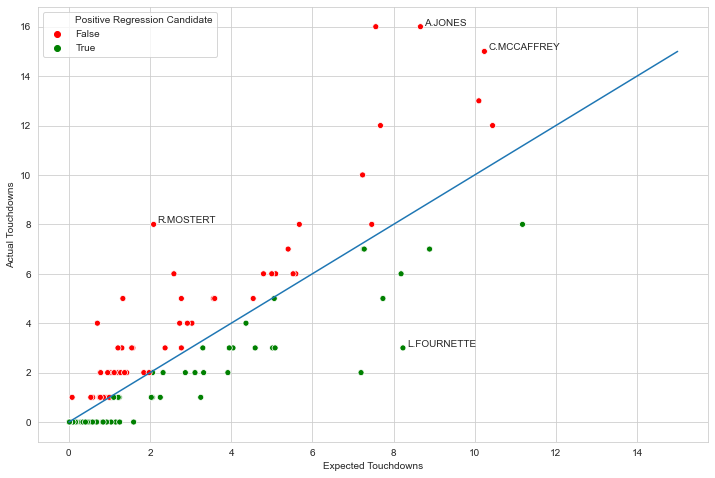

In [80]:
from matplotlib import pyplot as plt; sns.set_style('whitegrid');

fig, ax = plt.subplots(figsize=(12, 8))

# creating a new column with either True/False based on if Regression Candidate is a positive number
df['Positive Regression Candidate'] = df['Regression Candidate'] > 0

# simple scatter plot
sns.scatterplot(
    x = 'Expected Touchdowns',
    y = 'Actual Touchdowns',
    hue = 'Positive Regression Candidate',
    data = df,
    palette = ['r', 'g'] # red and green
);

max_act_touchdowns = int(df['Actual Touchdowns'].max()) # max touchdowns
max_exp_touchdowns = int(df['Expected Touchdowns'].max()) # max expected touchdowns

max_tds = max(max_act_touchdowns, max_exp_touchdowns) # max of actual and expected tds

sns.lineplot(range(max_tds), range(max_tds)) # plotting a line with slope of 1 up to max_tds number

# initialize a list of notable player's we'd like to annotate the visualization with.
notable_players = ['L.FOURNETTE', 'A.JONES', 'C.MCCAFFREY', 'R.MOSTERT']

for _, row in df.iterrows():
    if row['Player'] in notable_players: 
        ax.text(
            x = row['Expected Touchdowns']+.1, # add a bit of spacing from the point in the x-direction
            y = row['Actual Touchdowns'] + 0.05, # same but in the y-direction
            s = row['Player'] # annotate with the player's name
        )
